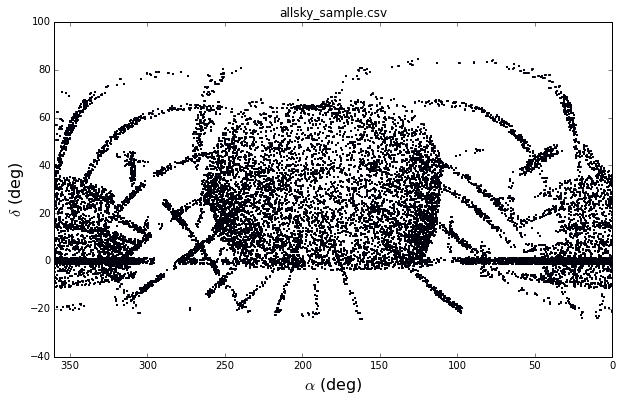

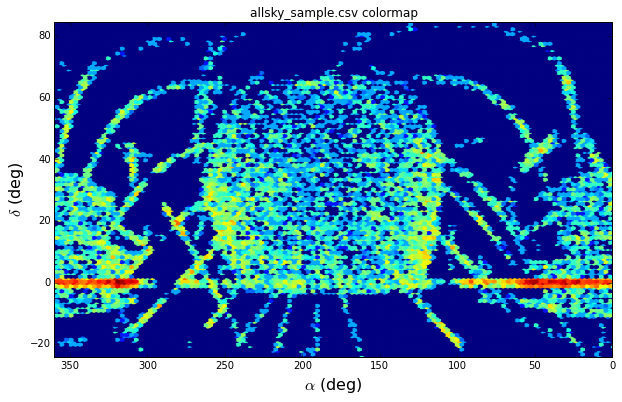

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Number 1

data = np.genfromtxt('../allsky_sample.csv',delimiter=',',skiprows=1)

plt.figure(figsize=[10,6])
plt.scatter(data[:,6],data[:,7], s=1)
plt.xlim([360,0])
plt.xlabel(r'$\alpha$ (deg)',size=16)
plt.ylabel(r'$\delta$ (deg)',size=16)
plt.title('allsky_sample.csv')
plt.figure(figsize=[10,6])
plt.hexbin(data[:,6],data[:,7],bins='log',gridsize = 120,cmap='jet')

plt.xlim([360,0])
plt.title('allsky_sample.csv colormap')
plt.xlabel(r'$\alpha$ (deg)',size=16)
plt.ylabel(r'$\delta$ (deg)',size=16)

b values for 5 objects closest to plane: 

[ 0.01224807  0.01331944 -0.01333851 -0.01447694  0.01507945]

ra and dec values for the same 5 objects:

[[  30.32108368   61.41147037]
 [  30.31963128   61.41278392]
 [  25.49209167   61.95064133]
 [ 307.86959285   39.80978861]
 [  30.32164964   61.41433807]]


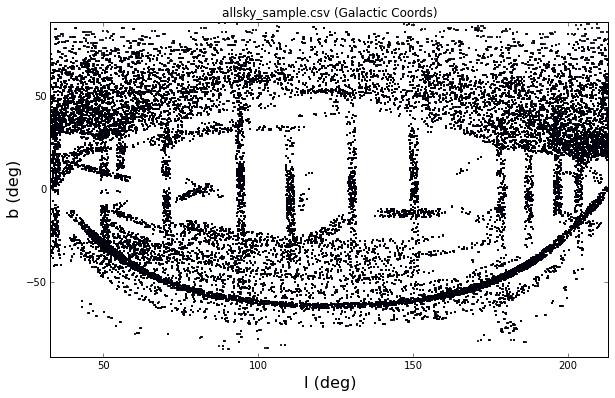

In [49]:
#Number 2
def equgal(ra, dec):
    ra=np.radians(ra)
    dec=np.radians(dec)
    b = np.arcsin(np.sin(dec)*np.cos(np.radians(62.6))-np.cos(dec)*np.sin(ra-np.radians(282.25))*np.sin(np.radians(62.6)))
    l = np.arccos((np.cos(dec)*np.cos(ra-np.radians(282.25)))/np.cos(b))+np.radians(33)
    return np.degrees(l),np.degrees(b)

ra_dat=data[1:,6]
dec_dat=data[1:,7]

l,b = equgal(ra_dat, dec_dat)
plt.figure(figsize=[10,6])
plt.scatter(l,b,s=1)
plt.xlabel('l (deg)',size=16)
plt.ylabel('b (deg)',size=16)
plt.ylim([-90,90])
plt.xlim([l.min(),l.max()])
plt.title('allsky_sample.csv (Galactic Coords)')

print 'b values for 5 objects closest to plane: '
print ''
print b[np.argsort(np.abs(b))[:5]]
print ''
print 'ra and dec values for the same 5 objects:'
print ''
print data[1+np.argsort(np.abs(b))[:5],6:8]

Yay! We have the right number of pairs!


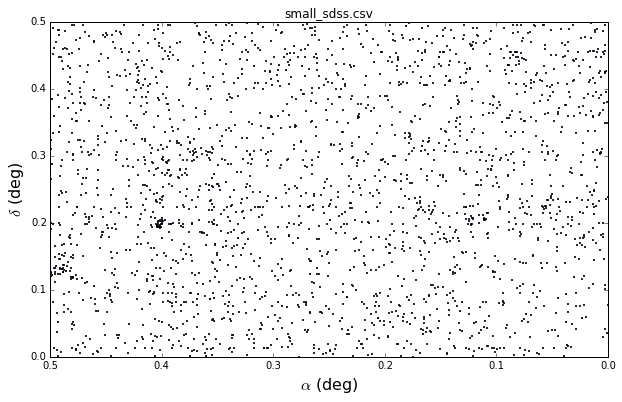

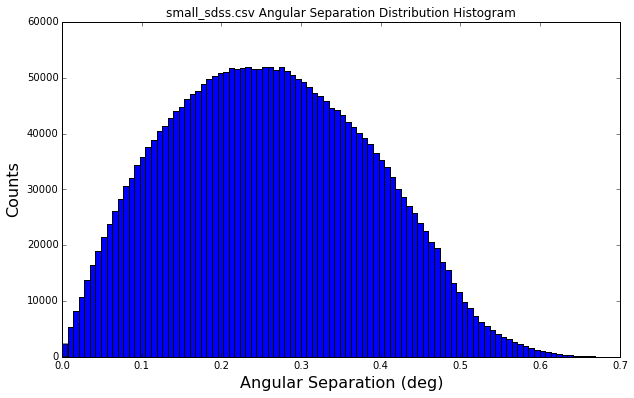

In [50]:
#Number 3
data2=np.genfromtxt('../small_sdss.csv',delimiter=',',skiprows=1)

def gc_dist(lon1, lat1, lon2, lat2):
    lon1=np.radians(lon1)
    lat1=np.radians(lat1)
    lon2=np.radians(lon2)
    lat2=np.radians(lat2)
    return np.degrees(np.arccos(np.sin(lat1)*np.sin(lat2)+np.cos(lat1)*np.cos(lat2)*np.cos(np.abs(lon1-lon2))))

plt.figure(figsize=[10,6])
plt.scatter(data2[:,0],data2[:,1],s=1)
plt.xlim([0.5, 0])
plt.ylim([0,0.5])
plt.xlabel(r'$\alpha$ (deg)',size=16)
plt.ylabel(r'$\delta$ (deg)',size=16)
plt.title('small_sdss.csv')

lon,lat=equgal(data2[:,0],data2[:,1])
pairinds = np.triu_indices(np.size(lon),1) #two arrays for the pairwise indices

dist = gc_dist(lon[pairinds[0][:]],lat[pairinds[1][:]],lon[pairinds[1][:]],lat[pairinds[0][:]])

if np.size(pairinds)/2 == 2690040:
    print 'Yay! We have the right number of pairs!'

plt.figure(figsize=[10,6])
bins=plt.hist(dist,bins=100,normed=False);
plt.ylabel('Counts',size=16)
plt.xlabel('Angular Separation (deg)',size=16)
plt.title('small_sdss.csv Angular Separation Distribution Histogram')

Random dataset matches SDSS dataset, so the sources in the SDSS set are randomly distributed.


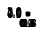

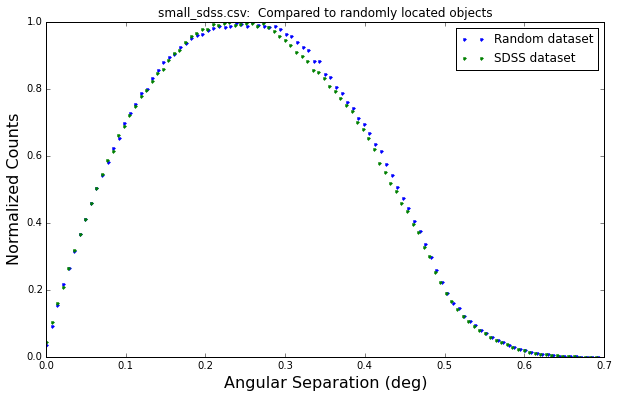

In [51]:
#Extra Credit (Numerical Solution)
#generate random ra and dec between 0 and 0.5
#convert to longitudes and latitutdes, compute angular seps
#plot against SDSS set, see if it fits

randdat=0.5*np.random.rand(2000,2)

lonrand,latrand=equgal(randdat[:,0],randdat[:,1])
pairindsrand = np.triu_indices(np.size(lonrand),1)
distrand = gc_dist(lonrand[pairindsrand[0][:]],latrand[pairindsrand[1][:]],lonrand[pairindsrand[1][:]],latrand[pairindsrand[0][:]])

plt.figure(figsize=[0.05,0.05]) #ignore this plot,just needed to generate binsrand
binsrand=plt.hist(distrand,bins=100,normed=True)

plt.figure(figsize=[10,6])
plt.plot(binsrand[1][:-1],binsrand[0]/binsrand[0].max(),'.',bins[1][:-1],bins[0]/bins[0].max(),'.')
plt.legend(['Random dataset','SDSS dataset'])
plt.ylabel('Normalized Counts',size=16)
plt.xlabel('Angular Separation (deg)',size=16)
plt.title('small_sdss.csv:  Compared to randomly located objects')

print 'Random dataset matches SDSS dataset, so the sources in the SDSS set are randomly distributed.'

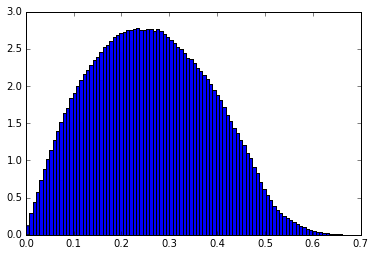

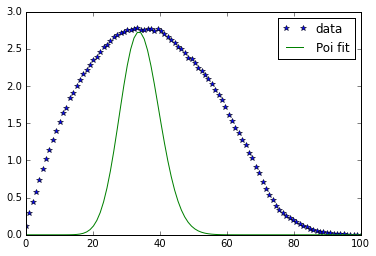

In [52]:
#Extra Credit Analytic Method
#fitting to a Poisson distrubution to prove randomness
#Nevermind, it doesn't work
#it gets the mean and amplitude right, but not the width
#maybe poisson shouldn't fit anyway?

from scipy.misc import factorial
from scipy.optimize import curve_fit

def poifunc(x, mu):
    return (np.exp(-mu)*(mu**x))/(factorial(x))

s=np.linspace(0,100,100)

bins=plt.hist(dist,bins=100,normed=True);
binedges=bins[1][1:]
binvals=bins[0]

p,pcov=curve_fit(poifunc,s,binvals)

plt.figure()
plt.plot(s,binvals,'*',s,poifunc(s,p[0])*40)
plt.legend(['data','Poi fit'])